In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import datasets

from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt
import numpy as np

# 03. scikit-learn机器学习分类器一览

## 3.1 选择分类算法
每种算法都是基于某些假设且有其自身的特点，为特定问题选择合适的分类算法需要实践经验。

分类器最终的计算性能以及预测能力在很大程度上取决于可供学习的基础数据。训练机器学习算法的主要步骤可以概括如下：
1. 选择特征并收集训练样本
2. 选择度量性能的指标
3. 选择分类器并优化算法
4. 评估模型的性能
5. 调整算法

## 3.2 了解scikit-learn软件库的第一步——训练感知器
作为理解scikit-learn软件库的起点，本章将训练类似在第2章中实现的感知器。

下面将用鸢尾花数据的两个特征来实现可视化。把150个鸢尾花样本的花瓣长度和宽度存入特征矩阵$X$，把相应的品种分类标签存入向量$y$：

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


鸢尾花的分类`iris-setosa`，`Iris-versicolor`和`iris-virginica`以整数`(0，1，2)`存储。分类标签编码为整数是大多数机器学习库常见的约定。

为了评估经过训练的模型对未知数据处理的效果，再进一步将数据集分裂成单独的训练集和测试集。

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

`train_test_split`函数在分割数据之前已经在内部将数据集混洗。通过设置`random_state`参数，为内部的伪随机数发生器提供一个固定的随机种子，这样就可以确保结果可重复。

通过定义`stratify=y`获得内置的分层支持。这种分层意味着调用`train_test_split`方法可以返回与输入数据集的分类标签相同比例的训练和测试数据子集。

调用`NumPy`的`bincount`函数来对阵列中的每个值进行统计，以验证数据：

In [4]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


许多机器学习算法要求对特征进行标准化以获得最佳性能。我们通过预处理模块`preprocessing`中的类`StandardScaler`来对特征进行标准化：

In [5]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

调用`StandardScaler`的`fit`方法对训练数据的每个特征维度参数$\eta$（样本均值）和$\sigama$（标准偏差）进行估算。然后调用transform方法，利用估计的参数$\eta$和$\sigma$对训练数据进行标准化。在标准化测试集时，要注意使用相同的特征调整参数以确保训练集与测试集的数值具有可比性。

scikit-learn软件库的大多数算法通过调用`一对其它`（OvR）方法，默认支持多元分类：

In [6]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

参数`eta0`表示感知器的学习率，`max_iter`定义了遍历训练集的迭代次数。

模型训练完之后，调用`predict`方法预测：

In [7]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 1


`scikit-learn`实现了大量各种不同的性能指标，可以调用`metrics`模块来使用。例如，可以计算测试集上感知器的分类准确度：

In [8]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


另外， 每个`scikit-learn`分类器都有一个评分方法，可以通过综合调用`predict`和`accuracy_score`计算出分类器的预测准确度：

In [9]:
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.98


> 第5章将学到包括图形分析在内的有用技术，如用来检测和防止过拟合的学习曲线

最后，利用第2章中的`plot_decision_regions`函数绘制新训练感知器的模型决策区，并以可视化的方式展示区分不同花朵样本的效果：

In [10]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],  y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

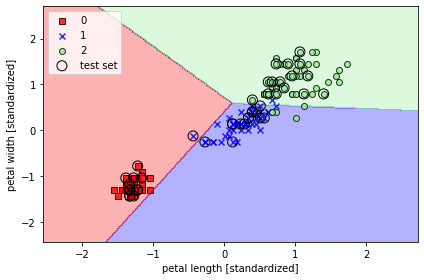

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

[Perceptron在线文档](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)。

## 3.3 基于逻辑回归的分类概率建模
虽然感知器规则提供了良好且易用的入门级机器学习分类算法，但其最大缺点是如果类不是完全线性可分的，那么它永远都不收敛。直观地说，可以把原因想成权重在不断更新，因为每个迭代至少会有一个错误分类样本存在。当然，也可以改变学习率，增加迭代次数，感知器永远不会在该数据集上收敛。为了提高效率，现在来看另一种简单且强大的解决线性二元分类问题的算法，即逻辑回归。不要望文生义，逻辑回归是一种分类模型，但不是回归模型。

### 3.3.1 逻辑回归的直觉与条件概率
逻辑回归是一种很容易实现的分类模型，但仅在线性可分类上表现不错。它是行业中应用最广泛的分类算法之一。

以下推导参考[文章](https://segmentfault.com/a/1190000008046030)。

要解释作为概率模型的逻辑回归原理，首先要介绍`让步比`（odds ratio），即有利于某一特定事件的概率。`让步比`可以定义为$\frac{p}{(1-p)}$，$p$代表阳性事件的概率，即要预测的事件。将阳性事件的分类标签设为$y=1$，则logit函数定义如下：
+ $\displaystyle \text{logit}(p) = \log{\frac{p}{(1-p)}}$

这仅仅是让步比的对数形式。注意`log`是自然对数，`logit`函数输入值的取值范围在0到1之间，转换或计算的结果值为整个实数范围，可以用它来表示特征值和对数概率（log-odds）之间的线性关系：
+ $\displaystyle\text{logit}\big(p(y=1|x)\big)= w_0x_0+w_1x_1+\cdots + w_mx_m = \sum_{i=0}^{m}w_ix_I=w^Tx$

这里$p(y=1|x)$是某个特定样本属于$x$类给定特征标签为$1$的条件概率。

实际上感兴趣的是预测某个样本属于某个特定类的概率，它是`logit`函数的逆形式。也被称为`sigmoid`函数：
+ $\displaystyle\phi{(z)} = \frac{1}{1+e^{-z}}$

这里$z$为净输入，是权重和样本特征的线性组合，$z = w^Tx = w_0x_0 + w_1x_1 + \cdots + w_mx_m$。

观察`sigmoid`函数的图形：

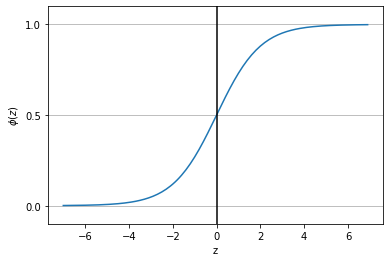

In [12]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

从上图可以看到，当$z$趋向无穷大时，$\phi{(z)}$的值接近于1；当$z$趋向无穷小时，$\phi{(z)}$的值趋于0。

为了获得对逻辑回归模型的一些直觉概念，可以把它与`Adaline`比较一下。`Adaline`用恒等函数$\phi{(z)} = z$作为激活函数。在逻辑回归中，这个激活函数简单地变成前面定义的`S函数`：

<img src="images/03_01.png" style="width:600px;"/>

`S函数`的输出接着被翻译成样本属于第1类的概率，$\phi{(z)} = P(y=1 | x;w)$，假设特征$x$被权重$w$参数化。

例如对某种花的样本，计算出其$\phi{(z)} = 0.8$，该样本属于`Iris-versicolor`的机会为`80%`。因此，该样本属于`Iris-setosa`的概率可以计算为$P(y=0|x;w) = 1 - P(y=1|x;w) = 0.2$或者`20%`。预测概率可以通过阈函数转换为二元输出：
+ $\displaystyle\begin{equation}\hat{y} = 
\left\{
\begin{array}{l}
1 & \text{if} \; \phi{(z)} \ge 0.5 & \\
0 & \text{otherwise}
\end{array}
\right.
\end{equation}$

事实上，有许多应用程序不仅对预测分类标签感兴趣，而且也对评估类中成员概率也特别有兴趣（在应用阈值函数之前S函数的输出）。例如，天气预报用逻辑回归不仅能预测某天是否会下雨，而且还能预报下雨的可能性。同样，可以用逻辑回归来预测病人在某些症状下有特定疾病的机会，这就是为什么逻辑回归在医学领域备受欢迎。

### 3.3.2 学习逻辑代价函数的权重
现在简要讨论一下如何拟合模型的参数。上一章定义平方和误差代价函数为：
+ $\displaystyle J(w) = \sum_i\frac{1}{2}\bigg(\phi{(z^{(i)})}-y^{(i)}\bigg)^2$

要解释清楚如何得到逻辑回归的代价函数，需要首先定义在建立逻辑回归模型时想要最大化的可能性$L$。假设数据集中的样本都是相互独立的个体，即数据遵从独立同分布，则似然函数可以写为(参考关于似然函数的文章)：
+ $\displaystyle L(w) = P(y|x;w) = \prod_{i=1}^{n}P\bigg(y^{(i)}|x^{(i)};w\bigg) = \prod_{i=1}^{n}P\bigg(\phi{\big(z^{(i)}\big)}\bigg)^{y^{(i)}}\bigg(1-\phi{\big(z^{(i)}\big)}\bigg)^{1-y^{(i)}}$

把似然函数变为对数形式方便最大化：
+ $\displaystyle l(w) = \log{(L(w))} = \sum_{i=1}^{n}\bigg[y^{(i)}\log{\big(\phi{(z^{(i)})}\big)}+\big(1-y^{(i)}\big)\log{\big(1-\phi{(z^{(i)})}\big)}\bigg]$

首先，应用对数函数降低数值下溢的可能性，这种情况在似然率非常小的情况可能发生。其次，假如你还记得微积分的话，可以把因子乘积转换成因子求和，这样就可以通过加法技巧更容易地得到该函数的导数。

现在可以用诸如梯度上升等优化算法来最大化这个对数似然函数。另外一个选择是重写对数似然函数作为代价函数$J$，用梯度下降方法最小化代价函数$J$：
+ $\displaystyle J(w) = \sum_{i=1}^{n}\bigg[-y^{(i)}\log{\big(\phi{(z^{(i)})}\big)} - \big(1-y^{(i)}\big)\log{\big(1-\phi{(z^{(i)})}\big)}\bigg]$

为了更好地理解这个代价函数，让我们计算一个样本训练实例的代价：
+ $\displaystyle J(\phi{(z)},y;w) = -y\log{(\phi{(z)})} - (1-y)\log{(1-\phi{(z)})}$

从方程中可以看到，如果$y=0$，第一项为零，如果$y=1$，第二项为零：
+ $\displaystyle\begin{equation}J(\phi{(z)},y;w) = 
\left\{
\begin{array}{l}
-\log{(\phi{(z)})} & \text{if} \quad y=1 & \\
-\log{(1-\phi{(z)})} & \text{if} \quad y=0
\end{array}
\right.
\end{equation}$

Let's write a short code snippet to create a plot that illustrates the cost of classifying a single-sample instance for different values of $\phi{(z)}$:

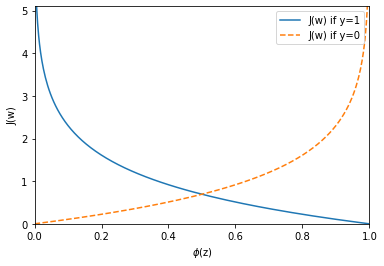

In [13]:
def cost_1(z):
    return - np.log(sigmoid(z))

def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.show()

结果图中的`x`轴显示了`S函数`（即$\phi{(z)}$）的激活情况，范围在0到1之间（`S函数`的输入值`z`的范围在-10到10之间），`y`轴是相关联的逻辑代价。

从上图可以看到，如果正确地预测样本属于第1类（$y=1$），代价就会接近0；如果正确地预测$y=0$，那么代价也接近0。然而，如果预测错误，代价就会趋于无穷大。关键在于用越来越大的代价惩罚错误的预测。

### 3.3.3 把转换的Adaline用于逻辑回归算法
如果要自己动手实现逻辑回归，可以直接用新的代价函数取代第2章中实现的Adaline代价函数`J`：
+ $\displaystyle J(w) = \sum_{i=1}^{n}\bigg[-y^{(i)}\log{\big(\phi{(z^{(i)})}\big)} - \big(1-y^{(i)}\big)\log{\big(1-\phi{(z^{(i)})}\big)}\bigg]$

在对训练样本进行分类的过程中，用上面的公式来计算每次迭代的代价。另外，需要用S激活函数替换线性激活函数，同时把阈值函数的返回类标签变为0和1，而不是-1和1：

In [14]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.
    Parameters
    ------------
    eta : float, Learning rate (between 0.0 and 1.0)
    n_iter : int, Passes over the training dataset.
    random_state : int, Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array, Weights after fitting.
    cost_ : list, Logistic cost function value in each epoch.
    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

这个逻辑回归模型只适用于二元分类，所以我们只考虑`Iris-setosa`和`Iris-versicolor`两种花（类0和类1），并验证逻辑回归的有效性：

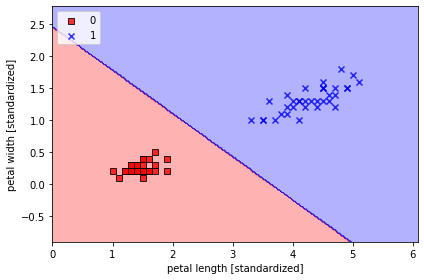

In [15]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,  y=y_train_01_subset, classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

逻辑回归的梯度下降学习算法的推导参考我的笔记《逻辑回归/02_梯度下降法求解》。

### 3.3.4 用scikit-learn训练逻辑回归模型
本节学习如何使用更优化的scikit-learn的逻辑回归模型算法实现，该算法实现也支持多元分类场景（默认`OvR`）：

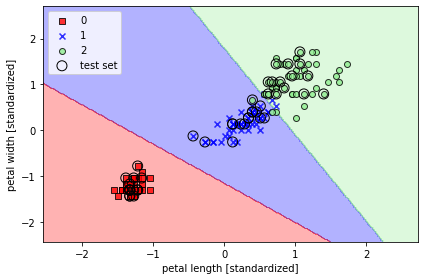

In [16]:
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='auto')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

> 下一节将介绍过拟合和正则化的概念，到时再讨论参数C的作用。

属于训练集中某个特定类的概率可以用`predict_proba`计算。例如，可以预测测试集中前三类的概率如下：

In [17]:
lr.predict_proba(X_test_std[:3, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

The first row corresponds to the class-membership probabilities of the first flower, the second row corresponds to the class-membership probabilities of the third flower, and so forth.

注意，如所预见的那样，列数据之和为1：

In [18]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

第一行的最大值约为0.999，这意味着预测第一个样本属于第三类（Iris-virginica）的概率为99.9%。可以通过识别每行中最大列值得到预测的分类标签：

In [19]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

执行结果分别对应于Iris-virginica，Iris-setosa，Iris-setosa。

直接调用`predict`方法验证如下：

In [20]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

最后提醒一句，如果想单独预测花样本的分类标签，scikit-learn期望输入一个二维阵列。因此，必须先把单行转换成这种格式。调用NumPy的reshape方法增加一个新维度可以将一行数据转换成为二维阵列，代码如下：

In [21]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

### 3.3.5 通过正则化解决过拟合问题
过拟合指模型在训练数据上表现良好，但无法概括未见过的新数据。如果某个模型过拟合，我们也会说该模型具有较高的方差，可能是因为相对于给定的数据，参数太多，模型过于复杂。同样，模型也可能会出现偏置高欠拟合的情况，这意味着模型不足以捕捉训练数据中的复杂模式，因此对未见过的数据表现不良。

比较线性决策边界和更复杂的非线性决策边界是阐明过拟合与欠拟合问题的最好方法，如下图所示：

<img src="images/03_02.png" style="width:600px;"/>

> Variance measures the consistency (or variability) of the model prediction for a particular sample instance if we were to retrain the model multiple times, for example, on different subsets of the training dataset. We can say that the model is sensitive to the randomness in the training data. In contrast, bias measures how far off the predictions are from the correct values in general if we rebuild the model multiple times on different training datasets; bias is the measure of the systematic error that is not due to randomness.

找到好的偏差--方差平衡的方法之一是通过正则化来调整模型的复杂性。正则化是处理共线性（特征之间的高相关性），滤除数据中的噪声，并最终避免过拟合的非常有效的方法。正则化的逻辑是引入额外的信息（偏置）来惩罚极端的参数值（权重）。最常见的正则化是所谓的$L2$正则化 （有时也称为$L2$收缩或权重衰减），具体如下：
+ $\displaystyle\frac{\lambda}{2}\Vert w\Vert^2 = \frac{\lambda}{2}\sum_{j=1}^{m}w_j^2$

在这里$\lambda$为所谓的正则化参数。

> 正则化是样本特征缩放（例如标准化）极为重要的另一个原因。要正常进行正则化必须确保所有样本特征的比例都适当。

逻辑回归的代价函数可以通过增加一个简单的正则项来调整，这将在模型训练的过程中缩小权重：
+ $\displaystyle J(w) = \sum_{i=1}^{n}\bigg[-y^{(i)}\log{\big(\phi{(z^{(i)})}\big)} - \big(1-y^{(i)}\big)\log{\big(1-\phi{(z^{(i)})}\big)}\bigg] + \frac{\lambda}{2}\Vert w\Vert^2$

$\lambda$正则化参数可以控制如何在更好地拟合训练数据的同时保持较小的权重。可以通过加大$\lambda$值增加正则化的强度。

scikit-learn实现`LogisticRegression`类的参数$C$来自于支持向量机的约定，下一节将讨论该主题。$C$与$\lambda$直接相关联，与正则化参数$\lambda$成反比。因此，降低逆正则化参数$C$意味着增加正则化的强度：

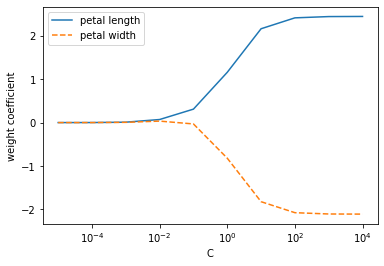

In [22]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],  label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

我们只收集分类标签为1的权重系数而不是所有类，记住采用的是一对多（OvR）的多元分类技术。减小参数$C$增大正则化的强度，权重系数变小。

## 3.4 支持向量机的最大余量分类
另外一种强大而且广泛使用的机器学习算法是支持向量机， 可以把它当成是感知器的延伸。感知器算法的目标是把分类误差减少到最小，而SVM优化的目标是寻找最大化的边界。边界定义为分离超平面（决策边界）与其最近的训练样本之间的距离，即所谓的支持向量。下图对此做了展示：

<img src="images/03_03.png" style="width:600px;"/>

### 3.4.1 最大边际的直觉
决策边界间隔大的模型背后的理由是它们往往有较低的泛化误差，而间隔较小的模型则更容易过拟合。为了更好地解释间隔最大化的概念，让我们仔细看看那些与决策边界平行的正超平面和负超平面，表示如下：
+ $w_0+\pmb{w}^T\pmb{x}_{pos} = 1$
+ $w_0+\pmb{w}^T\pmb{x}_{neg} = -1$

把两个线性等式相减可以得到：
+ $\Rightarrow \pmb{w}^T(\pmb{x}_{pos} - \pmb{x}_{neg}) = 2$

可以通过向量$w$的长度归一化该方程，定义如下：
+ $\displaystyle\Vert w\Vert = \sqrt{\sum_{j=1}^{m}w_j^2}$

因此得到下述方程：
+ $\displaystyle\frac{\pmb{w}^T(\pmb{x}_{pos} - \pmb{x}_{neg})}{\Vert w\Vert} = \frac{2}{\Vert w\Vert}$

方程的左边可以被解释为超平面正负之间的距离，即想要最大化的所谓间隔。现在，支持向量机的目标函数变成通过最大化$\frac{2}{\Vert w\Vert}$来最大化间隔，在样本分类正确的条件约束下，可以表示为：

$\displaystyle\begin{align}
w_0+\pmb{w}^T\pmb{x}^{(i)} &\ge 1 , \text{if} \ y^{(i)}=1 \\
w_0+\pmb{w}^T\pmb{x}^{(i)} &\le -1  , \text{if} \ y^{(i)}=-1 \\
& \text{for} \quad i=1,2,\cdots n
\end{align}$

这里$N$为数据集中的样本数量。

基本上，这两个方程所有的负样本应该都落在超平面的负面，而所有的正样本应该都落在超平面的正面，可以以更紧凑的方式表示：
+ $\displaystyle y^{(i)}(w_0+\pmb{w}^T\pmb{x}^{(i)}) \ge 1 \quad \forall_i$

> 原文推导到此为止，详细的推导参考我的笔记

### 3.4.2 用松弛变量处理非线性可分
尽管不想对最大间隔分类背后更复杂的数学概念进行讨论，但还是要简要地提一下松弛变量$zeta$，它引出了所谓的`软间隔分类`。引入松弛变量$zeta$的目的是要处理非线性可分数据，放松线性约束需要，允许在分类错误存在的情况下通过适当代价的惩罚来确保优化可以收敛。

可以直接把阳性松弛变量加入线性约束：

$\displaystyle\begin{align}
w_0+\pmb{w}^T\pmb{x}^{(i)} &\ge 1 - \zeta^{(i)}, \text{if} \ y^{(i)}=1 \\
w_0+\pmb{w}^T\pmb{x}^{(i)} &\le -1+\zeta^{(i)}, \text{if} \ y^{(i)}=-1 \\
& \text{for} \quad i=1,2,\cdots n
\end{align}$

这里$N$为数据集中的样本数量。因此新的最小化目标（约束主体）就表示为：
+ $\displaystyle\frac{1}{2}\Vert w\Vert^2 + C\bigg( \sum_{i}\zeta^{(i)}\bigg)$

可以通过变量$C$来控制对分类错误的惩罚。$C$值越大相应的错误惩罚就越大，如果选择较小的$C$值，则对分类错误的要求不那么严。因此，可以用参数$C$来控制间隔的宽度，从而权衡偏置方差，如下图所示：

<img src="images/03_04.png" style="width:500px;"/>

该概念与上节讨论的正则化回归相关，即减小$C$值增加偏置，但降低模型的方差。

现在可以训练一个支持向量机模型来对鸢尾花数据集中的不同种花进行分类：

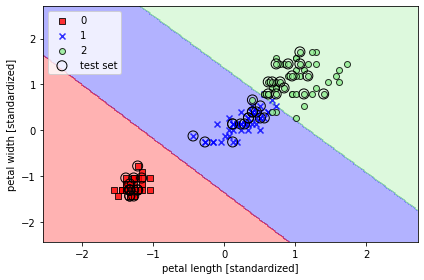

In [23]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,  y_combined, classifier=svm,  test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

> 逻辑回归与支持向量机
> 
> 在实际的分类任务中，线性逻辑回归和线性支持向量机通常会产生非常相似的结果。逻辑回归试图最大化训练数据的条件似然性，使其比SVM更容易离群，支持向量机主要关心的是最接近决策边界的点。另一方面，逻辑回归也有优点，其模型更简单更容易实现。此外，逻辑回归模型更容易更新，这在处理流式数据时很有吸引力

## 3.5 用核支持向量机求解非线性问题
支持向量机享有较高知名度的另一个原因是容易通过核化来解决非线性分类问题。我们创建一个样本数据集来观察这种非线性分类问题的具体情形。

### 3.5.1 处理线性不可分数据的核方法
执行下述代码创建一个简单的数据集，调用`NumPy`的`logical_or`函数形成一个异或门，其中有100个样本的分类标签为1，100个样本的分类标签为-1：

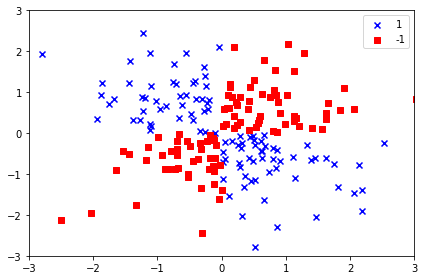

In [27]:
np.random.seed(1)

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

线性逻辑回归或线性支持向量机模型所产生的线性超平面无法作为决策边界来分隔样本的正类和负类。

核方法的逻辑是针对线性不可分数据，建立非线性组合，通过映射函数把原始特征投影到一个高维空间，特征在该空间变得线性可分。如下图所示，可以将一个二维数据集转换为一个新的在三维空间上表示的特征，这样就可以通过下述投影完成分类：
+ $\phi{(x_1, x_2)} = (z_1, z_2, z_3) = (x_1, x_2, x_1^2+x_2^2)$

通过线性超平面可以将图中所示的两类分开，如果把它投射到原来的特征空间上，将形成非线性决策边界：

<img src="images/03_05.png" style="width:600px;"/>

### 3.5.2 利用核技巧，发现高维空间的分离超平面
为了使用SVM解决非线性问题，需要调用映射函数$\phi$将训练数据变换成在高维度空间上表示的特征，然后训练线性SVM模型对新特征空间里的数据进行分类。可以用相同的映射函数$phi$对新的、未见过的数据进行变换，用线性支持向量机模型进行分类。

然而，这种映射方法的问题是构建新特征的计算成本非常高，特别是在处理高维度数据时。这就是所谓的`核技巧`可以发挥作用的地方。虽然没有详细研究如何通过解决二次规划任务来训练支持向量机，但实际上只需要用$\pmb{x}^{(i)T}\pmb{x}^{(j)}$点乘替换$\phi{(\pmb{x}^{(i)})}^T\phi{(\pmb{x}^{(j)})}$ 。为显著降低计算两点间点乘的昂贵计算成本，定义所谓的`核函数`如下：
+ $\displaystyle\mathcal{K}\big(x^{i}, x^{(j)}\big) = \phi{\big( x^{(i)}\big)}^T\phi{\big( x^{(j)}\big)}$

其中最为广泛使用的是`径向基核函数`（RBF）或简称为`高斯核`：
+ $\displaystyle\mathcal{K}\big(x^{i}, x^{(j)}\big) = exp\bigg( -\frac{\Vert x^{(i)}-x^{(j)}\Vert^2}{2\alpha^2} \bigg)$

该公式常被简化为：
+ $\displaystyle\mathcal{K}\big(x^{i}, x^{(j)}\big) = exp\bigg( -\gamma\Vert x^{(i)}-x^{(j)}\Vert^2 \bigg)$

这里，$\gamma = \frac{1}{2\alpha^2}$是要优化的自由参数。

简而言之，术语`核`可以理解为两个样本之间的相似性函数。公式中的负号把距离反转为相似性得分值，而指数运算把由此而产生的相似性得分值控制在1（完全相似）和0（非常不同）之间。

现在训练核支持向量机来划出非线性决策边界，以区分XOR数据。使用`scikit-learn`库的`SVC`类，以参数`kernel='rbf'`替换`kernel='linear'`：

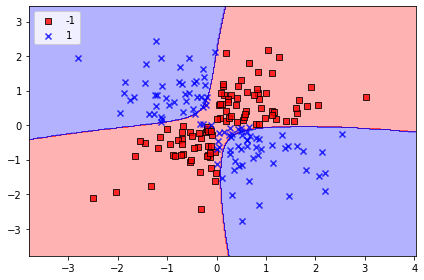

In [28]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,  classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()